# Building an Image Classifier

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.6.0'

In [4]:
tf.__version__

'2.6.0'

we are going to create image classifier. 


We will use the **Fashion Imnist** Database which is avaible in keras datasets. 

It contains 10 differents categories images.

70 000 images in all (train set: 60 000 , test set: 10 000)

In [5]:
Fashion_mnist=keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = Fashion_mnist.load_data()

In [7]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


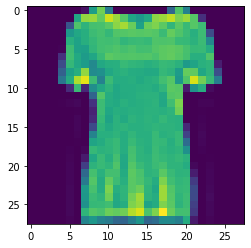

In [8]:
plt.imshow(X_train_full[10])

In [9]:
y_train_full[10]

0

0 --> T-shirtop ;
1 --> Trouser ;
2 --> Pullover ;
3 --> Dress ;
4 --> Coat ;
5 --> Sandal ;
6 --> Shirt ;
7 --> Sneaker ;
8 --> Bag ;
9 --> Ankle Boot

Nous allons créer une liste contenant le nom des 10 classes pour se réferer par les noms

In [10]:
class_names=["T-shir/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [11]:
class_names[y_train_full[10]]

'T-shir/top'

In [12]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization
We normalize the data dimensions so that theyare approximatively the same scale

One way to do that to our data is to divise our data by 255 --> data between 0 and 1

NB: La technique la plus utilisée consiste à retrancher la moyenne ensuite diviser par l'écart type

In [13]:
X_train_n=X_train_full/255.  # 255. pour éviter les divisions entières
X_test_n=X_test/255.

* **Train set** : use for training the model
* **Validation set** : use to optimize the performance of our model. used for tuning the hyperparameters and evaluate the model
* **Test set** : used to test the model after the model has gone through initial vetting by validation set

In [14]:
X_valid, X_train= X_train_n[:5000], X_train_n[5000:]
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]

## there are two ways to create ANN using keras:
* sequential model API plus simple
* Functional API plus complex

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model=keras.models.Sequential()     # chaque entrée du layer n-1 sera reliée à chaque neurone du layer n
model.add(keras.layers.Flatten(input_shape=[28,28]))  # input layer: chaque image est dans une matrice 28*28 (784 entrées),
                                                      # voir help(Flatten) 
model.add(keras.layers.Dense(300, activation="relu")) # First hidden layer: 300 neurones, chaque entrée est reliée à chacune
                                                      # des 300 neurones et pondérée par un poid w_i, soit 235200 + 300 biais
                                                      # => 235 500 parametres
model.add(keras.layers.Dense(100, activation="relu")) # 2e hidden layer: 100 neurones, les 300 valeurs fournies sur le 1er 
                                                      # hidden layer après activation seront relièes à chacune des 100 neurones
                                                      # + 100 biais => 30100 parametres
model.add(keras.layers.Dense(10, activation="softmax")) # Out put layer (multiple class, softmax)

In [17]:
help(keras.layers.Flatten)

Help on class Flatten in module keras.layers.core:

class Flatten(keras.engine.base_layer.Layer)
 |  Flatten(*args, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  Note: If inputs are shaped `(batch,)` without a feature axis, then
 |  flattening adds an extra channel dimension and output shape is `(batch, 1)`.
 |  
 |  Args:
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, ..., channels)` while `channels_first` corresponds to
 |      inputs with shape `(batch, channels, ...)`.
 |      It defaults to the `image_data_format` value found in your
 |      Keras config file at `~/.keras/keras.json`.
 |      If you never set it, then it will be "channels_last".
 |  
 |  Example:
 |  
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)

In [18]:
model.summary()  # none signifie qu'on a fournie toutes les données d'entrée

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### We can look at our neural network's structure by:

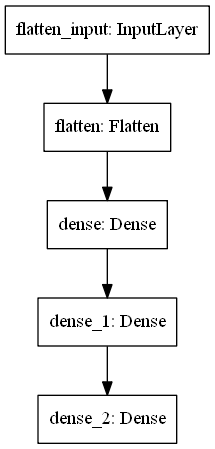

In [19]:
import pydot
keras.utils.plot_model(model)

### we can access the parameters by using get_weight() 

In [21]:
weights, biais = model.layers[1].get_weights()

In [22]:
weights # les valeurs iniatialement affectée aux poids w_i pour lancer la descent de gradient

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biais # biais initialisés à 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biais.shape

(300,)

#### set up learning process

https://keras.io/api/models/model_training_apis/

In [26]:
help(model.compile)

Help on method compile in module keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(optimizer=tf.keras.optimizer.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(),
                           tf.keras.metrics.FalseNegatives()])
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: Loss function. Maybe be a string (name of loss function), or
          a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where `y_true` are the ground tr

In [27]:
# la fonction coût: loss --> sparse categorical crossentropy car notre data set a 10 catégories labelisées
# si nous avons les proba d'appartenance aux class il faura utiliser categorical croos entropy, si 1 et 0 seulement
# il faut utiliser binary cross entropy

# optimizer: stochastic gradient descent pour sgd

# metrics = 'accurary' car nous faisons une classification, si regression il faut utilise mse

model.compile(loss='sparse_categorical_crossentropy',
             optimizer= 'sgd',
             metrics=['accuracy'])

###### difference between batch and epoch
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=The%20number%20of%20epochs%20is%20a%20hyperparameter%20that,epoch%20is%20comprised%20of%20one%20or%20more%20batches.

In [28]:
# The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through 
# the entire training dataset.

# on ajouter l parametre class_weight() si les classes ne sont uniformément reparties
model_history=model.fit(X_train, y_train, epochs=30,
                       validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8569 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3627 - val_accuracy:

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
model_history.history # to get loss accuracy and val_accuracy informations

{'loss': [0.7236780524253845,
  0.4843233525753021,
  0.43925395607948303,
  0.41249433159828186,
  0.39395850896835327,
  0.37522026896476746,
  0.36334460973739624,
  0.35189977288246155,
  0.3415890038013458,
  0.33219200372695923,
  0.32431620359420776,
  0.31506234407424927,
  0.30816128849983215,
  0.3023137152194977,
  0.29484379291534424,
  0.289277583360672,
  0.2841065526008606,
  0.277920126914978,
  0.27297961711883545,
  0.26764771342277527,
  0.26259559392929077,
  0.2577607333660126,
  0.253675252199173,
  0.24865274131298065,
  0.24440625309944153,
  0.24075055122375488,
  0.23647968471050262,
  0.23291146755218506,
  0.22853097319602966,
  0.22528870403766632],
 'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8453817963600159,
  0.8568727374076843,
  0.8618909120559692,
  0.8673818111419678,
  0.871399998664856,
  0.875,
  0.8785272836685181,
  0.8825091123580933,
  0.8830181956291199,
  0.8867999911308289,
  0.889018177986145,
  0.8916181921958923,
  0.8939

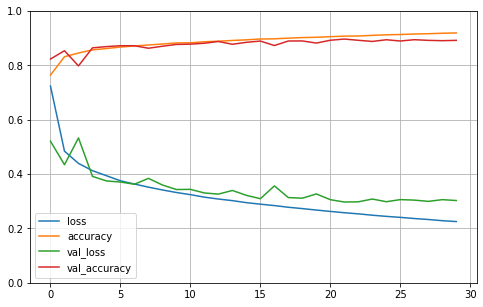

In [33]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)          # val_loss: validation loss
plt.show()                       # val_accuracy: validation accurary

si on ajoute d'autre epoch keras.fit continuera à partir de 30 là où l'entrainement s'est arrêté

### testing performance on a test data

In [34]:
model.evaluate(X_test_n,y_test) # [loss  , accuracy]

313/313 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8834


[0.3360535800457001, 0.883400022983551]

In [35]:
X_new=X_test[:3]

In [43]:
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
y_predict=model.predict_classes(X_new)
y_predict

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [49]:
y_pred=np.argmax(model.predict(X_new), axis=-1)

In [50]:
y_pred

array([9, 2, 1], dtype=int64)

In [51]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

### comparons les 3 predictions aux vraies images

AxesImage(54,36;334.8x217.44)


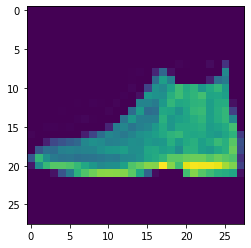

In [52]:
print(plt.imshow(X_test[0])) # bonne prediction

AxesImage(54,36;334.8x217.44)


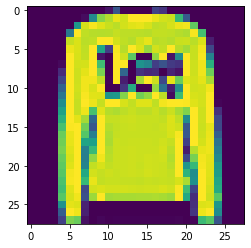

In [54]:
print(plt.imshow(X_test[1])) # bonne prediction

AxesImage(54,36;334.8x217.44)


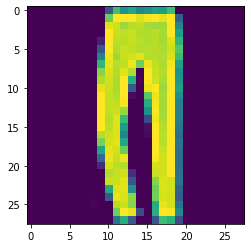

In [56]:
print(plt.imshow(X_test[2])) # bonne prediction